# 리소스 제작 노트북
이 노트북은 구글 드라이브에 저장된 아래와 같은 도트 스프라이트에서 각 캐릭터의 첫 번째 스프라이트를 추출하여 리사이징 한 뒤 저장하는 노트북입니다.

![원본](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbleKGd%2FbtqG9BTWOwM%2FGDKuy1DKCQxOPqH2AspIwK%2Fimg.png) ![수정](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdZNTBe%2FbtqG9BfpIA0%2Fx1wCRRqINMLYmkNRS6t4tK%2Fimg.png)

# 구글 드라이브 마운트
`google colab`에서 `opencv`를 사용하려면 구글 드라이브에 저장된 이미지를 사용해야 합니다. 이를 위해선 구글 드라이브를 마운트할 필요가 있습니다. 다음 코드를 실행하여 구글 드라이브를 마운트합니다. 최초 실행 시 출력되는 링크에 접속하여 권한을 허용하면, 다음과 같이 인증 코드가 표시됩니다. 해당 인증 코드를 복사하여 아래 입력창에 붙여넣고 엔터를 누릅니다.

![인증](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbqYQEb%2FbtqHnluZ5T7%2FavcPeg3SSTnnw5J6xsmiIK%2Fimg.png)

![권한 허용](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FnvHOO%2FbtqHnk3UYN2%2F1uANmxM7q3FFPolOyoNdn0%2Fimg.png)

![인증 코드](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FXTzXU%2FbtqHq2PftjY%2F2M7VZN0yGWKp4B3ino8rG0%2Fimg.png)

![인증 후](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fd4cm3p%2FbtqHhEP5fNI%2FCpXBp8UzdFd3hx0Z6vWUWk%2Fimg.png)

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 이미지 로드
이미지를 구글 드라이브에서 불러오고, 주피터 노트북에 출력해봅시다. 이미지를 출력할 때 기존 문법과 달리, colab에서는 `google.colab.patches` 패키지의 `cv2_imshow` 함수를 이용합니다.

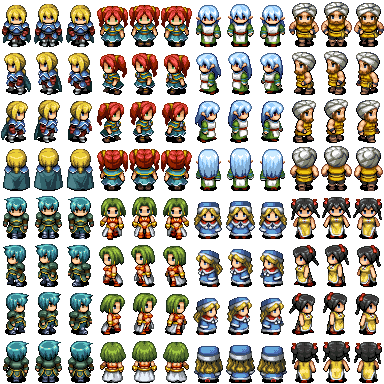

In [ ]:
# 이미지 로드
import cv2
from google.colab.patches import cv2_imshow
src = cv2.imread('/content/drive/My Drive/돈과 유명세를 잡자/Zumi/resources/Credits- Tekepon 1.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(src)

# 이미지 슬라이스, 리사이즈
이미지에서 캐릭터는 가로 32픽셀, 세로 48픽셀의 크기이며, 가로로 3칸마다 4개의 캐릭터가, 세로로 4칸마다 2개의 캐릭터가 있습니다. 이를 각 캐릭터의 왼쪽 위, 첫 번째 모션만 잘라서 크기를 키워보도록 하겠습니다.

크기를 키워도 도트 이미지가 뭉개지지 않도록, 이미지 보간 방법으로 Nearest Neighbor를 사용합니다. 이는 resize 과정에서 interpolation 옵션으로 `cv2.INTER_NEAREST`를 사용하여 적용할 수 있습니다.

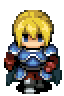

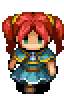

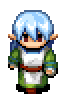

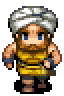

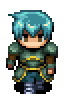

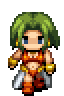

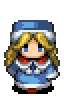

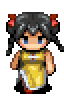

In [ ]:
# 이미지 슬라이스, 리사이즈
w, h, _ = src.shape

# cell size
cx, cy = 32, 48
# cell position
dx, dy = 3 * cx, 4 * cy
# resized cell size
rx, ry = 2 * cx, 2 * cy

for y in range(0, h, dy):
  for x in range(0, w, dx):
    dst = src[y:y+cy, x:x+cx]
    dst = cv2.resize(dst, (rx, ry), interpolation=cv2.INTER_NEAREST)
    cv2_imshow(dst)

# 이미지 순회 및 저장
모든 작업이 끝났으니 이제 13장의 이미지를 순회하며 모든 작업을 적용하도록 하겠습니다. 이미지는 원본 이미지와 같은 폴더에 `Hero 1.png`와 같은 형식으로 저장됩니다. 구글 드라이브를 확인하면 104개의 캐릭터가 알맞게 저장된 것을 확인할 수 있습니다.

![구글 드라이브 1](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcBfsBS%2FbtqHq2aDZDY%2FSEUbIVDn49eNQkFiJqpk01%2Fimg.png)

![구글 드라이브 2](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FFZh3w%2FbtqHmztHvmi%2FNke7gKKJE05w6M0mwhQy90%2Fimg.png)

In [ ]:
# 이미지 순회 및 저장
import cv2
from google.colab import drive

## 구글 드라이브 마운트
drive.mount('/content/drive')

## 작업 경로 설정
workspace = '/content/drive/My Drive/돈과 유명세를 잡자/Zumi/resources/{filename}' # {filename} 앞 경로를 리소스가 존재하는 경로로 변경하세요.
loadFileName = workspace.format(filename='Credits- Tekepon {num}.png') # 파일 이름은 `image 1.png`와 같은 형식이어야 합니다.
saveFileName = workspace.format(filename='Hero {num}.png') # 파일 이름은 `image 1.png`와 같은 형식이어야 합니다.

## settings
### cell size
cx, cy = 32, 48
### cell position
dx, dy = 3 * cx, 4 * cy
### resized cell size
rx, ry = 15 * cx, 15 * cy

## 이미지 로드
num = 1
for i in range(1, 14):
  src = cv2.imread(loadFileName.format(num=i), cv2.IMREAD_UNCHANGED)
  w, h, _ = src.shape

  ## 이미지 슬라이스, 리사이즈
  for y in range(0, h, dy):
    for x in range(0, w, dx):
      dst = src[y:y+cy, x:x+cx]
      dst = cv2.resize(dst, (rx, ry), interpolation=cv2.INTER_NEAREST)
      cv2.imwrite(saveFileName.format(num=num), dst)
      num += 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
